Command history:

    %run parse_log.py logs/6players/mixed outlogs/6players/mixed parsed.hdf
    %run parse_log.py logs/6players/better outlogs/6players/better parsed.hdf
    %run parse_log.py logs/6players/chron outlogs/6players/chron parsed.hdf
    %run parse_log.py logs/6players/stupid outlogs/6players/stupid parsed.hdf
    
    %run parse_log.py logs/5players/mixed outlogs/5players/mixed parsed.hdf
    %run parse_log.py logs/5players/better outlogs/5players/better parsed.hdf
    %run parse_log.py logs/5players/chron outlogs/5players/chron parsed.hdf
    %run parse_log.py logs/5players/stupid outlogs/5players/stupid parsed.hdf
    
    %run parse_log.py logs/4players/mixed outlogs/4players/mixed parsed.hdf
    %run parse_log.py logs/4players/better outlogs/4players/better parsed.hdf
    %run parse_log.py logs/4players/chron outlogs/4players/chron parsed.hdf
    %run parse_log.py logs/4players/stupid outlogs/4players/stupid parsed.hdf
    
    %run parse_log.py logs/3players/mixed outlogs/3players/mixed parsed.hdf
    %run parse_log.py logs/3players/better outlogs/3players/better parsed.hdf
    %run parse_log.py logs/3players/chron outlogs/3players/chron parsed.hdf
    %run parse_log.py logs/3players/stupid outlogs/3players/stupid parsed.hdf
    %run parse_log.py logs/3players/chronvbetter outlogs/3players/chronvbetter parsed.hdf

In [8]:
%run parse_log.py logs/ outlogs/test parsed

logs\mylog0.game4.log list index out of range
logs\mylog1.game15.log list index out of range
logs\mylog2.game9.log list index out of range
logs\mylog3.game20.log list index out of range


In [7]:
df = pd.read_hdf("outlogs/few/parsed0.hdf")
df.sample(10)

,Player 0 Alaska,Player 0 Northwest Territories,Player 0 Greenland,Player 0 Alberta,Player 0 Ontario,Player 0 Quebec,Player 0 Western United States,Player 0 Eastern United States,Player 0 Mexico,Player 0 Venezuala,...,Player 2 player_average_boundary_fortifications,Player 0 player_connected_components,Player 1 player_connected_components,Player 2 player_connected_components,winner,Player 1 soft score,Second,Player 0 soft score,Third,Player 2 soft score
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.500000,1.0,4.0,3.0,1,1,0,0.5,2,0.333333
95,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.833333,6.0,5.0,5.0,1,1,0,0.5,2,0.333333
40,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,4.0,6.0,4.0,1,1,0,0.5,2,0.333333
70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.300000,4.0,6.0,6.0,1,1,0,0.5,2,0.333333
48,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.333333,4.0,6.0,5.0,1,1,0,0.5,2,0.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,1.0,2.0,0.0,1,1,0,0.5,2,0.333333
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.800000,3.0,5.0,4.0,1,1,0,0.5,2,0.333333
72,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.400000,4.0,6.0,6.0,1,1,0,0.5,2,0.333333
24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,2.0,5.0,4.0,1,1,0,0.5,2,0.333333
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.0,5.0,1.0,1,1,0,0.5,2,0.333333


In [46]:
from scipy.special import softmax

import os
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py as h5

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
import keras

In [9]:
folder = "outlogs/02_nth_turn_datasets/"
turns = []
for entry in os.scandir(folder):
    if (entry.path.endswith(".hdf") and entry.is_file()):
        turn = int(entry.path.split("_")[-2])
        turns.append(turn)
print(turns)

[150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700]


In [57]:
 #https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html
def plot_cm(cm, num_players, title, cmap=plt.cm.Blues):
    classes = ["Player {}".format(i) for i in range(1,num_players+1)]
    
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(num_players)
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True winner', labelpad=12)
    plt.xlabel('Predicted winner', labelpad=12)
    plt.tight_layout()
    plt.show()
def plot_cms(cms, num_players, suptitle, titles, cmap=plt.cm.Blues):
    classes = ["Player {}".format(i) for i in range(1,num_players+1)]
    
    fig, axs = plt.subplots(1, len(cms), figsize=(12,8))
    for i in range(len(cms)):
        cm = cms[i]
        ax = axs[i]
        ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.set_title(titles[i])
        tick_marks = np.arange(num_players)
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=0)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)
        thresh = cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                     fontsize=23, color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True winner', labelpad=12)
        plt.xlabel('Predicted winner', labelpad=12)
        
    plt.suptitle(suptitle)  
    plt.tight_layout()
    plt.show()

200th turn dataset loaded
300th turn dataset loaded
350th turn dataset loaded
400th turn dataset loaded
450th turn dataset loaded
500th turn dataset loaded
550th turn dataset loaded
600th turn dataset loaded
650th turn dataset loaded
Train on 32530 samples, validate on 8137 samples
Epoch 1/30
32530/32530 [==============================] - 3s 105us/step - loss: 10.3564 - accuracy: 0.1434 - val_loss: 7.1737 - val_accuracy: 0.2223
Epoch 2/30
32530/32530 [==============================] - 2s 68us/step - loss: 5.4480 - accuracy: 0.2818 - val_loss: 3.8188 - val_accuracy: 0.3472
Epoch 3/30
32530/32530 [==============================] - 2s 74us/step - loss: 2.8801 - accuracy: 0.4325 - val_loss: 2.1629 - val_accuracy: 0.5147
Epoch 4/30
32530/32530 [==============================] - 2s 73us/step - loss: 1.8778 - accuracy: 0.5649 - val_loss: 1.6682 - val_accuracy: 0.5937
Epoch 5/30
32530/32530 [==============================] - 2s 72us/step - loss: 1.5395 - accuracy: 0.6129 - val_loss: 1.4569 - v

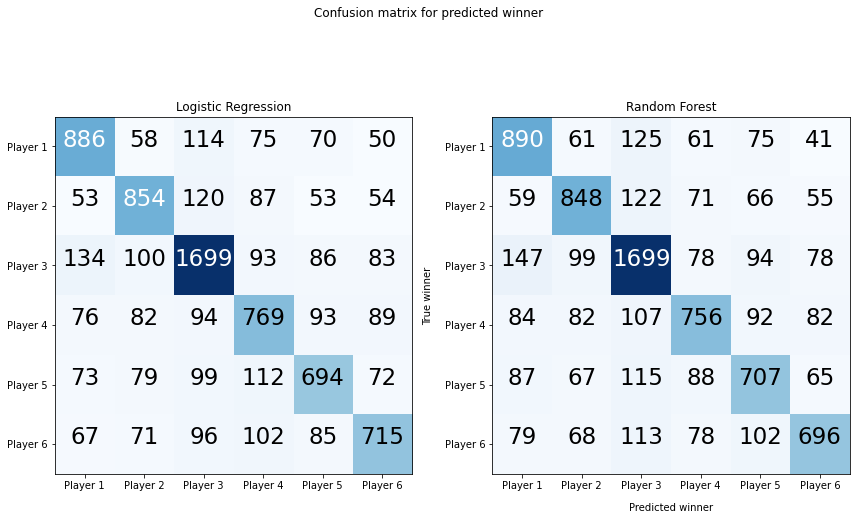

In [58]:
folder = "outlogs/nth turn datasets/"
#folder = "outlogs/02_nth_turn_datasets/"
num_players = 6
i_features = ['Player {} Africa', 'Player {} Asia', 'Player {} Australia', 'Player {} Europe', 'Player {} South America',
            'Player {} North America', 'Player {} Continental Reward', 'Player {} Country Count', 
            'Player {} Total Reinforcements', 'Player {} Troop Count', 'Player {} Troop Increase Due to Country Count',] 
features = []
for i in range(num_players):
    features = features + [feature.format(i) for feature in i_features]
targets = ["Player {} soft score".format(i) for i in range(num_players)]

def run_regression(w = 0.7, drop_ties=True):
    """ w is controls how much weight we assign to winning.
    If w is 0.7, then 1st place gets 0.7, 2nd place gets 0.7*(1-0.7) = 0.21 and so on
    """
    best_weights = []
    X, y = None, None
    X_train, X_test, y_train, y_test, y_train_1col = None, None, None, None, None
    for entry in os.scandir(folder):
        if not (entry.path.endswith(".hdf") and entry.is_file()):
            continue
        splits = entry.path.split("_")
        turn = int(splits[-2])
        
        fi = h5.File(entry.path, 'r')
        values = np.array(fi.get('/dataframe/block0_values'))
        colnames = np.array(fi.get('/dataframe/block0_items')).astype(str)
        data = pd.DataFrame(values, columns=colnames)
            
        #Only needed for the second nth turn datasets
        #df.columns = df.columns.astype(str)
        #df.to_hdf('UPDATED_' + filename, 'dataframe')
        #for i, col in enumerate(['winner', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth'][:num_players]):
        #    player_index = int(data[col][0])
        #    data[f'Player {player_index} soft score'] = (i+1)**-1
        
        #data = pd.read_hdf(entry.path)
        #del data['total_numer_turns_in_game']
        if drop_ties:
            data = data.dropna() #drop stalemate games for now
        data[targets] = data[targets] ** -1
        data[targets] = (1-w)**(data[targets]-1)*(w**(data[targets] < num_players-0.1))
        #data[targets] = softmax(data[targets], axis=1) #convert to probabilities
        X_ = data.filter(items=features)
        y_ = data.filter(items=targets)
        #print(X.columns.values)
        #print(y.head())
        train_index, test_index = list(ShuffleSplit(n_splits=1, test_size=0.2).split(X_))[0]
        X_train_, X_test_, y_train_, y_test_ =  X_.iloc[train_index], X_.iloc[test_index], y_.iloc[train_index], y_.iloc[test_index]
        y_train_1col_ = data['winner'].astype(int).iloc[train_index]
        if X is None:
            X = X_
            y = y_
            X_train = X_train_
            X_test = X_test_
            y_train = y_train_
            y_test = y_test_
            y_train_1col = y_train_1col_
        else:
            X = pd.concat([X, X_], axis=0)
            y = pd.concat([y, y_], axis=0)
            X_train = pd.concat([X_train, X_train_], axis=0)
            X_test = pd.concat([X_test, X_test_], axis=0)
            y_train = pd.concat([y_train, y_train_], axis=0)
            y_test = pd.concat([y_test, y_test_], axis=0)
            y_train_1col = pd.concat([y_train_1col, y_train_1col_], axis=0)
        print(turn,"th turn dataset loaded", sep='')
            
    #Set up model
    input_dim = len(features)
    output_dim = num_players
    lnet = Sequential()
    dense = Dense(output_dim, input_dim=input_dim, activation='softmax', kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3))
    lnet.add(dense)
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    lnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    #train
    
    lnet.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_test, y_test))
    pred_probs = lnet.predict(X_test)
    #lreg = LogisticRegressionCV(multi_class="multinomial", solver="saga", max_iter=500, n_jobs=-1)
    #lreg.fit(X_train, y_train_1col)
    #pred_probs = lreg.predict_proba(X_test)

    y_true = np.argmax(y_test.values, axis=1) #use argsort to get all the positions instead of just winner
    y_pred = np.argmax(pred_probs, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    #train random forest
    params = {'max_depth': 12, 'max_features': 51, 'n_estimators': 200}
    rfc = RandomForestClassifier(**params, n_jobs = -1, oob_score = True, warm_start=False)
    rfc.fit(X_train, y_train_1col)
    sorted_indices = np.argsort(rfc.feature_importances_)

    #print("12 most important features", list(np.array(features)[sorted_indices[-12:]]))
    #print()
    #print("12 least important features", list(np.array(features)[sorted_indices[:12]]))

    #get confusion matrix for random forest
    pred_probs = rfc.predict_proba(X_test)
    y_pred = rfc.classes_[np.argmax(pred_probs, axis=1)]
    cm2 = confusion_matrix(y_true, y_pred)

    #plot confusion matrix 
    plot_cms([cm,cm2], num_players, "Confusion matrix for predicted winner",["Logistic Regression", "Random Forest"])

    #weights = dense.get_weights()
    #best_weights.append(weights)
    return lnet, rfc, X, y
lnet, rfc, X, y = run_regression(w=1)

In [60]:
#best_winner_weights = run_regression(w=1)
tsne = TSNE(n_components=2, n_jobs=-1)
X_embedded = tsne.fit_transform(X.values)

(40667, 2)


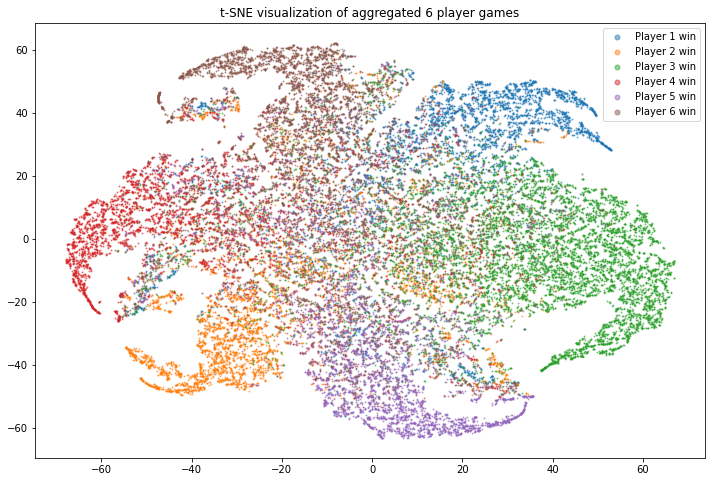

In [75]:
y_winners = np.argmax(y.values, axis=1)
print(X_embedded.shape)
plt.figure(figsize=(12,8))
for winner in np.unique(y_winners):
    xs = X_embedded[y_winners == winner]
    plt.scatter(xs[:,0], xs[:,1], marker='.', s=4, alpha=0.5, label="Player {} win".format(winner+1), )
plt.legend(markerscale=5)
plt.title("t-SNE visualization of aggregated 6 player games")
plt.show()